## CarPrice Prediction

#### Statement
- A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there
  and producing cars locally to give competition to their US and European counterparts.

- They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. 
  Specifically, they want to understand the factors affecting the pricing of cars in the American market,
  since those may be very different from the Chinese market. The company wants to know:
    - Which variables are significant in predicting the price of a car
    - How well those variables describe the price of a car
- Based on various market surveys,
  the consulting firm has gathered a large dataset of different types of cars across the Americal market.

#### Goal
- You are required to model the price of cars with the available independent variables. 
- It will be used by the management to understand how exactly the prices vary with the independent variables. 
- They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. 
- Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [95]:
import warnings # ignore warning msg
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading CarPrice dataset

In [96]:
df = pd.read_csv('CarPrice_Assignment.csv', sep=',', encoding='ISO-8859-1')
pd.options.display.max_columns = None #for visualizing all columns.

In [97]:
# checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

### Data Cleaning

In [98]:
# Spliting CarCompany and CarModel name from CarName
df['CarName']=df['CarName'].apply(lambda x : x.split(' ')[0])

In [99]:
df['CarName'].unique()#checking for unique counts

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

##### Replacing spelling errors

In [100]:
#As there are some spelling errors that need to be correct.
def rep_name(a,b):
    df.CarName.replace(a,b, inplace=True)

rep_name('maxda','mazda')
rep_name('vokswagen','volkswagen')
rep_name('vw','volkswagen')
rep_name('toyouta','toyota')
rep_name('porcshce','porsche')
rep_name('Nissan','nissan')

In [101]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [102]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [103]:
df.shape

(205, 26)

### Data Visualization

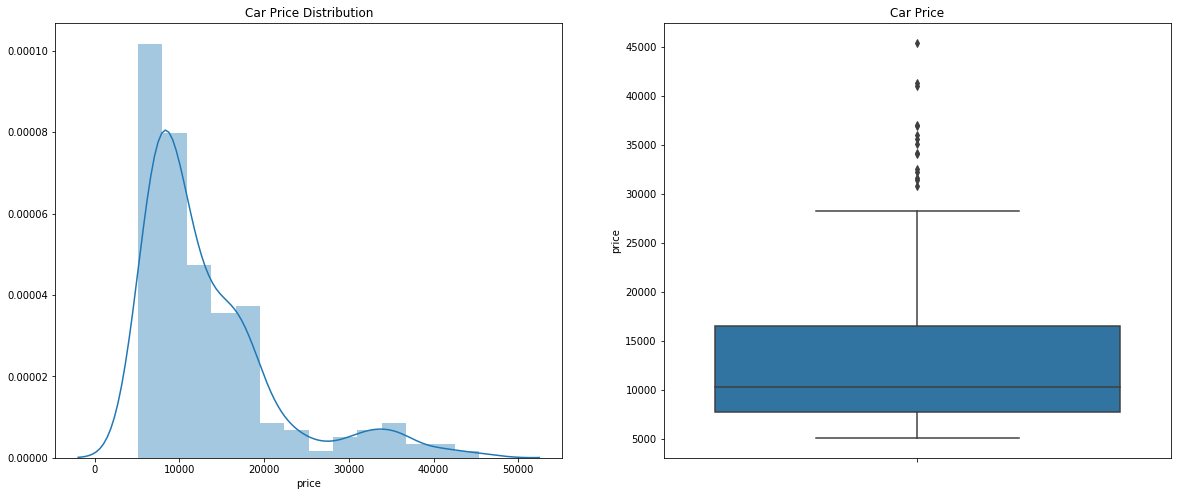

In [104]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution')
sns.distplot(df.price)

plt.subplot(1,2,2)
plt.title('Car Price')
sns.boxplot(y=df.price)

plt.show()


- It looks like price is normally distributed

##### Visualising categorical variable
- CarName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

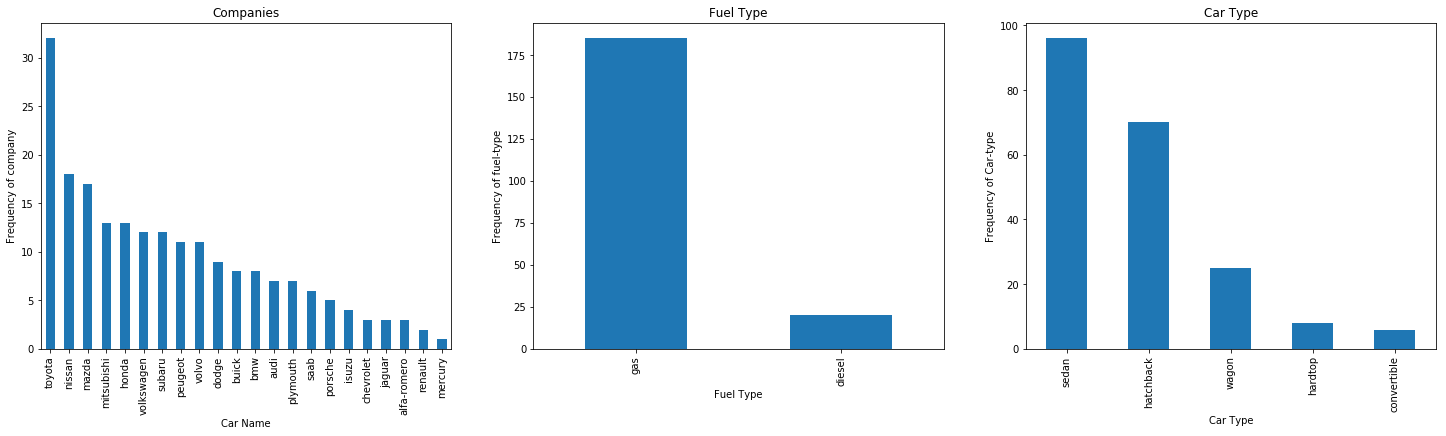

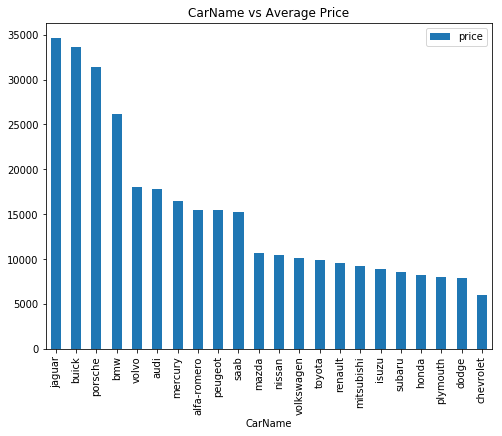

In [105]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CarName.value_counts().plot('bar')
plt.title('Companies')
plt1.set(xlabel = 'Car Name', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot('bar')
plt.title('Fuel Type')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel-type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot('bar')
plt.title('Car Type')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car-type')

df5 = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df5.plot.bar(figsize=(8,6))
plt.title('CarName vs Average Price')
plt.show()


- toyota shows most favoured car
- No. of gas fueled car more than diesel
- sedan is top prefered car
- Jaguar has higher selling price followed by buick, porsche

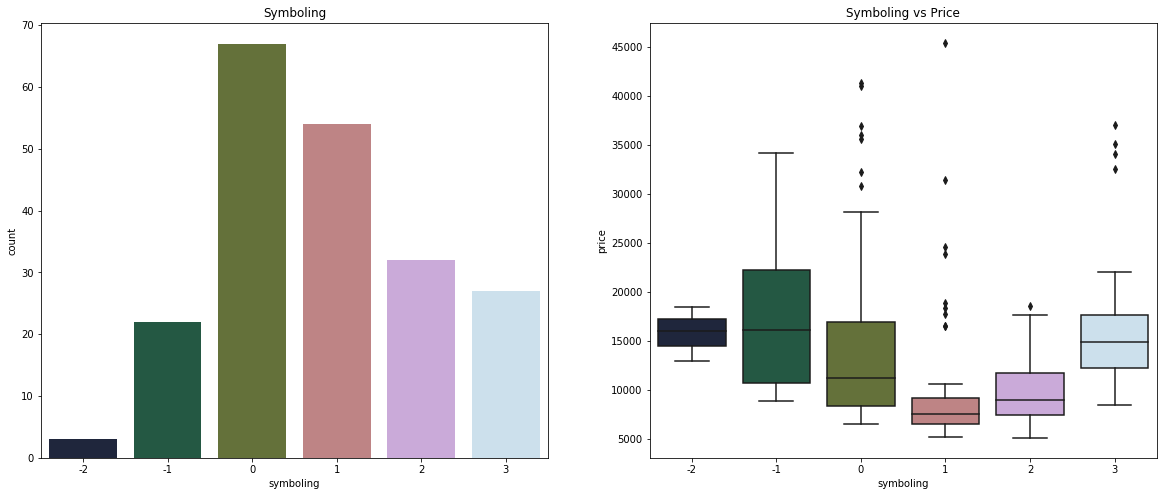

In [106]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Symboling')
sns.countplot(df.symboling, palette=("cubehelix"))

plt.subplot(1,2,2)
plt.title('Symboling vs Price')
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

plt.show()

- this shows that 0 and 1 have higher number of sold.
- there is drop in price range 1
- 3 is similar to price range -2

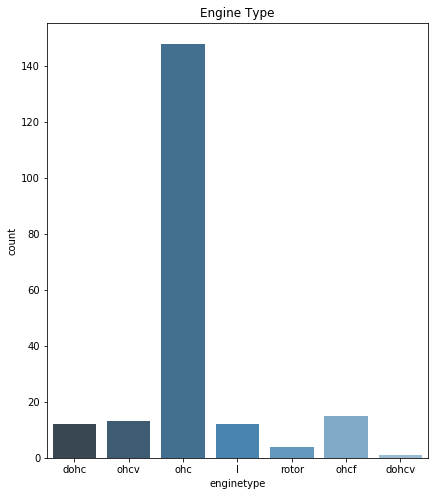

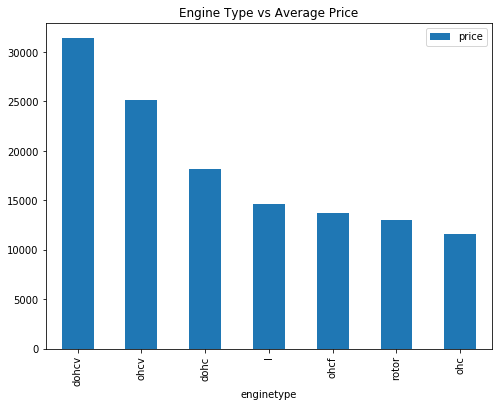

In [107]:
#engine type vs price
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Engine Type')
sns.countplot(df.enginetype, palette=("Blues_d"))

#plt.subplot(1,2,2)
df1 = pd.DataFrame(df.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df1.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

- ohcv engine type most favoured.
- ohc and ohcf has low price range

<Figure size 1800x432 with 0 Axes>

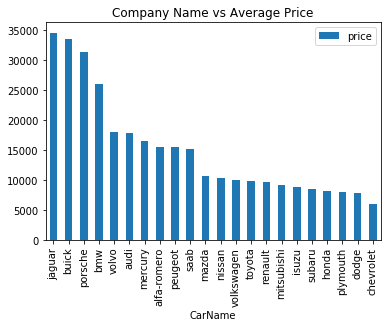

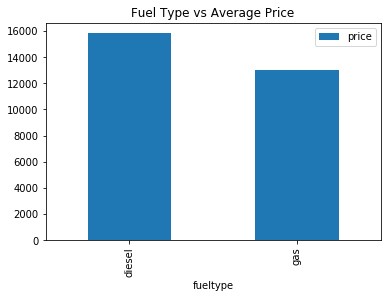

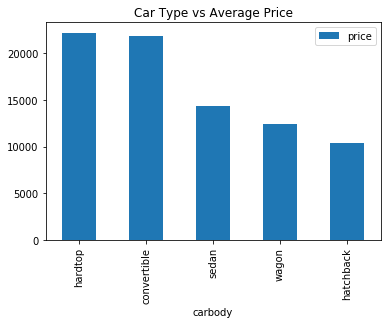

In [108]:
plt.figure(figsize=(25, 6))

df2 = pd.DataFrame(df.groupby(['CarName'])['price'].mean().sort_values(ascending = False))
df2.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df3 = pd.DataFrame(df.groupby(['fueltype'])['price'].mean().sort_values(ascending = False))
df3.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df4 = pd.DataFrame(df.groupby(['carbody'])['price'].mean().sort_values(ascending = False))
df4.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

- jaguar and buick have higher price range
- diesel has higher price than gas
- hardtop and convertible have higher price

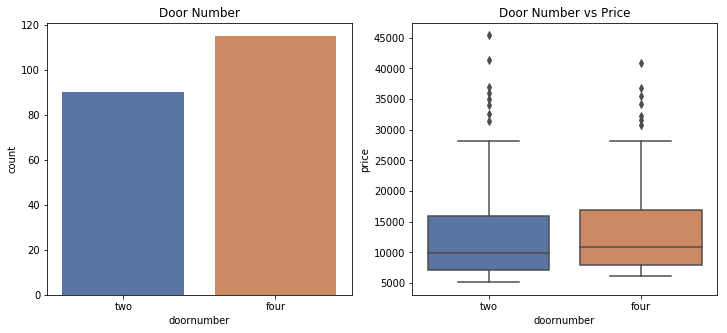

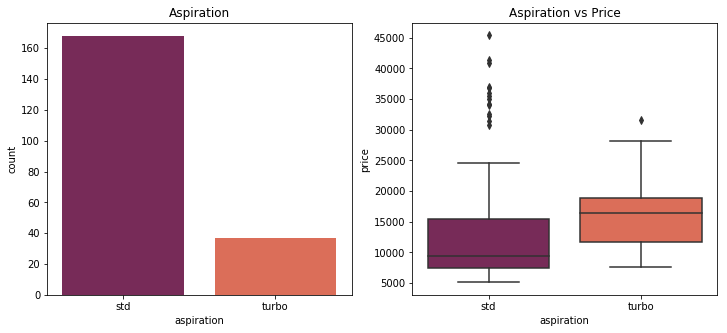

In [109]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Door Number')
sns.countplot(df.doornumber, palette=("deep"))

plt.subplot(1,2,2)
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("deep"))

plt.show()

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title('Aspiration')
sns.countplot(df.aspiration, palette=("rocket"))

plt.subplot(1,2,2)
plt.title('Aspiration vs Price')
sns.boxplot(x=df.aspiration, y=df.price, palette=("rocket"))

plt.show()

- doornumber four has higher number than two. 
- doornumber is not affecting much in price.
- turbo has higher price than std.
- little variance in price with aspiration.

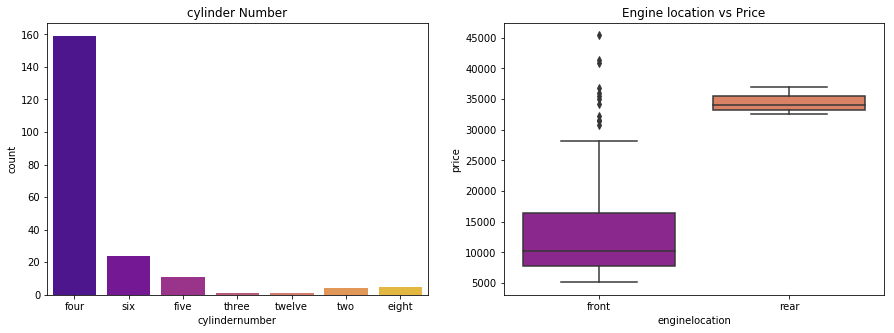

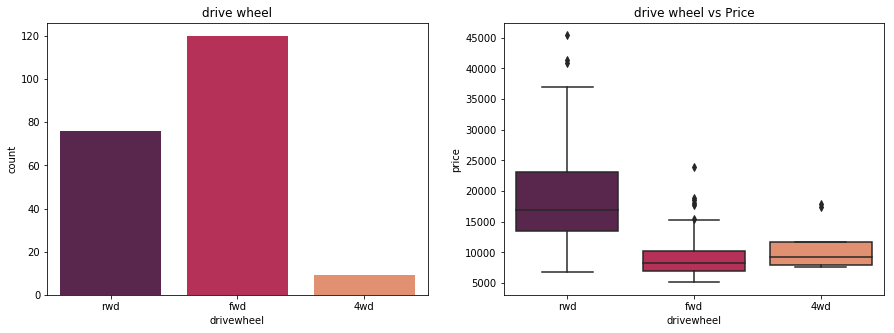

In [110]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('cylinder Number')
sns.countplot(df.cylindernumber, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Engine location vs Price')
sns.boxplot(x=df.enginelocation, y=df.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('drive wheel')
sns.countplot(df.drivewheel, palette=("rocket"))

plt.subplot(1,2,2)
plt.title('drive wheel vs Price')
sns.boxplot(x=df.drivewheel, y=df.price, palette=("rocket"))

plt.show()

- Most common cylinder are four, five, six
- A very few significant in drivewheel most higher price prefered FWD

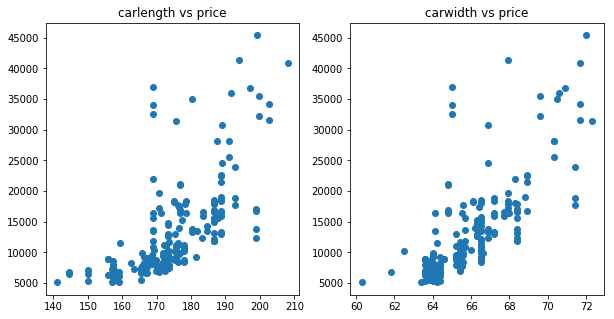

In [111]:
# Visualising through Scatter Plot
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(x=df.carlength, y=df.price)
plt.title('carlength vs price')

plt.subplot(1,2,2)
plt.scatter(x=df.carwidth, y=df.price)
plt.title('carwidth vs price')
plt.show()

- carlenght and carwidth shows positive correlation with price

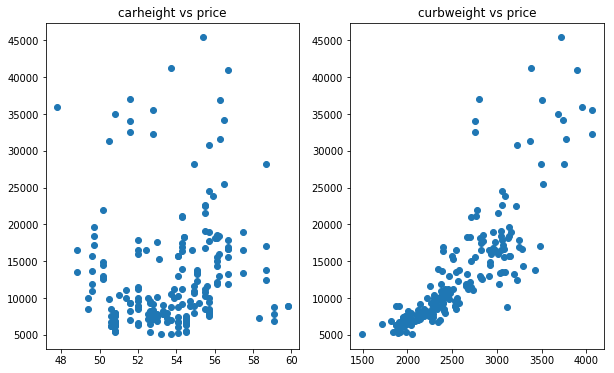

In [112]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.scatter(x=df.carheight, y=df.price)
plt.title('carheight vs price')

plt.subplot(1,2,2)
plt.scatter(x=df.curbweight, y=df.price)
plt.title('curbweight vs price')
plt.show()

- curbweight shows positive correlation with price.
- carheight doesnt show significant trend with price.

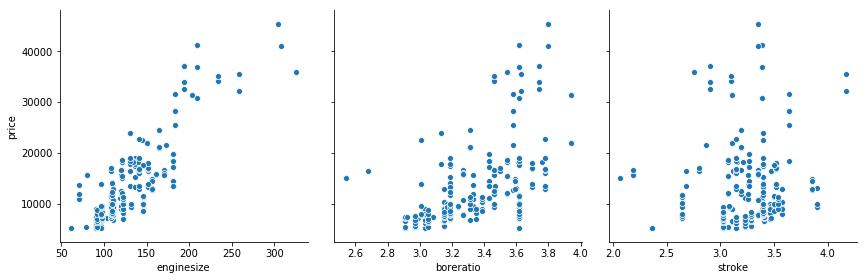

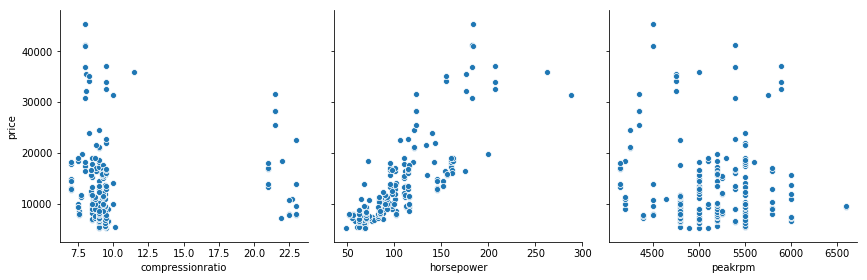

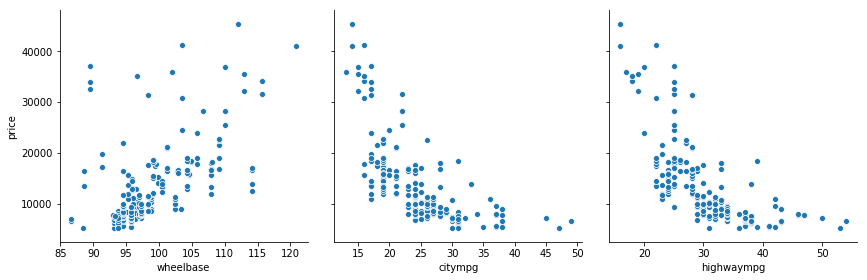

In [113]:
#using function showing categories with price
def pairplt(x,y,z):
    sns.pairplot(df, x_vars=[x,y,z], y_vars='price',size=4, aspect=1, kind='scatter')
    plt.show()

pairplt('enginesize', 'boreratio', 'stroke')
pairplt('compressionratio', 'horsepower', 'peakrpm')
pairplt('wheelbase', 'citympg', 'highwaympg')

- As enginesize, horsepower, wheelbase shows positive correlation with price.
- citympg, highwaympg shows negative correlation with price.

### Correlation between variables

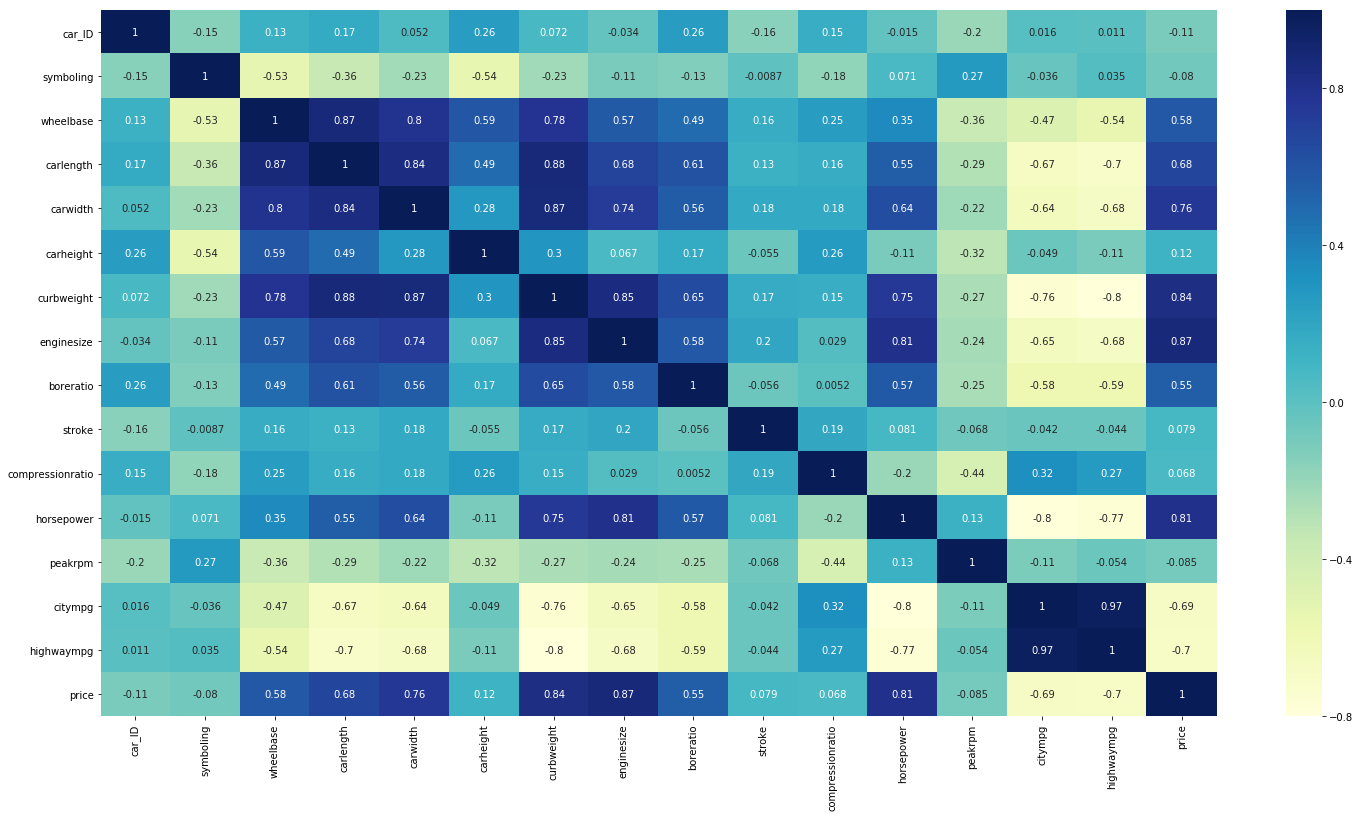

In [114]:
import seaborn as sns 
plt.figure(figsize = (25, 13))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

- high correlation between wheelbase, carlength, curbweight, carwidth, citympg, highwaympg 
- high correlation horsepower, enginesize, curbweight with target variable 'price'

### Creating dummy variable

In [115]:
#dummy=pd.get_dummies(df['fueltype'],prefix='fueltype',drop_first=True)
#df=pd.concat([df,dummy],axis=1)

#dummy=pd.get_dummies(df['aspiration'],prefix='aspiration',drop_first=True)
#df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df['carbody'],prefix='carbody',drop_first=True)
df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df['drivewheel'],prefix='drivewheel',drop_first=True)
df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df['enginetype'],prefix='enginetype',drop_first=True)
df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df['cylindernumber'],prefix='cylindernumber',drop_first=True)
df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df['enginelocation'],prefix='enginelocation',drop_first=True)
df=pd.concat([df,dummy],axis=1)

#dummy=pd.get_dummies(df['doornumber'],prefix='doornumber',drop_first=True)
#df=pd.concat([df,dummy],axis=1)

#dummy=pd.get_dummies(df['fuelsystem'],prefix='fuelsystem',drop_first=True)
#df=pd.concat([df,dummy],axis=1)

dummy=pd.get_dummies(df['CarName'],prefix='CarName',drop_first=True)
df=pd.concat([df,dummy],axis=1)

In [116]:
df.shape

(205, 66)

In [117]:
# Dropping the non-contributing variables after dummy creation.

In [118]:
df= df.drop(['symboling','car_ID','CarName','enginelocation','carbody',
             'drivewheel','enginetype','cylindernumber','compressionratio'
             ,'peakrpm','fuelsystem','citympg','highwaympg'],axis=1)

In [119]:
df.shape

(205, 53)

####  Label Encoding 

In [120]:
#import package for label encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [121]:
#Some of categorical variables having two object so label encode with 1s and 0s
df['fueltype']=le.fit_transform(df['fueltype'])
df['aspiration']=le.fit_transform(df['aspiration'])
df['doornumber']=le.fit_transform(df['doornumber'])

In [122]:
df.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginelocation_rear,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
0,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,111,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,154,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,102,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,115,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Spliting data into Train and Test Sets

In [123]:
from sklearn.model_selection import train_test_split

#We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

#### Scaling the numerical variable

In [124]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() #this is normalization where variables can be reduced between 0 and 1. 

In [126]:
#apply scaler() to all columns except dummy variables
num_var = ['fueltype','aspiration','doornumber','wheelbase','carlength','carwidth','carheight','curbweight',
           'enginesize','boreratio','stroke','horsepower','price']


In [127]:
# scaling the train dataset using scaler transformation
df_train[num_var]= scaler.fit_transform(df_train[num_var])

In [33]:
df_train.shape

(143, 53)

### Building Model Using RFE (Recursive Feature Elimination)

#### Spliting train set into X and y

In [34]:
y_train = df_train.pop('price')
X_train = df_train

In [35]:
#using statsmodel for model building
import statsmodels.api as sm
#add the constant to train variable
X_train_lm = sm.add_constant(X_train)
#calculate the Ordinary least Square after fitting the train data set
lr = sm.OLS(y_train,X_train_lm).fit()

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of variable equal to 20
lm = LinearRegression()
lm.fit(X_train, y_train)# fit the X and y train for RFE
rfe = RFE(lm,20)
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('fueltype', False, 30),
 ('aspiration', False, 4),
 ('doornumber', False, 32),
 ('wheelbase', False, 5),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('carheight', False, 6),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('horsepower', False, 12),
 ('carbody_hardtop', False, 15),
 ('carbody_hatchback', False, 14),
 ('carbody_sedan', False, 16),
 ('carbody_wagon', False, 17),
 ('drivewheel_fwd', False, 28),
 ('drivewheel_rwd', False, 31),
 ('enginetype_dohcv', False, 2),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 25),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 18),
 ('enginetype_rotor', True, 1),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 9),
 ('cylindernumber_three', True, 1),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', True, 1),
 ('enginelocation_rear', True, 1),
 ('CarName_audi', False, 11),
 ('CarName_bmw', True, 1),
 (

In [39]:
#Checking for supportive columns
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginetype_l', 'enginetype_ohcf', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'enginelocation_rear',
       'CarName_bmw', 'CarName_peugeot', 'CarName_porsche', 'CarName_saab',
       'CarName_subaru', 'CarName_volvo'],
      dtype='object')

In [40]:
#Checking for unsupportive columns
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'wheelbase', 'carlength',
       'carheight', 'horsepower', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginetype_dohcv', 'enginetype_ohc', 'enginetype_ohcv',
       'cylindernumber_six', 'CarName_audi', 'CarName_buick',
       'CarName_chevrolet', 'CarName_dodge', 'CarName_honda', 'CarName_isuzu',
       'CarName_jaguar', 'CarName_mazda', 'CarName_mercury',
       'CarName_mitsubishi', 'CarName_nissan', 'CarName_plymouth',
       'CarName_renault', 'CarName_toyota', 'CarName_volkswagen'],
      dtype='object')

#### Model building

In [41]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return X

from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF(X):
    vif = pd.DataFrame()#creating dataframe
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [42]:
#choosing the supportive columns for model building
X_train_rfe = X_train[col]

#### Model 1

In [43]:
X_train_new = build_model(X_train_rfe,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.19e-71
Time:                        11:51:13   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

In [44]:
#drop the high p-value
X_train_new = X_train_rfe.drop(["CarName_subaru"], axis = 1)

#### Model 2

In [45]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     130.5
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           6.19e-71
Time:                        11:51:13   Log-Likelihood:                 226.54
No. Observations:                 143   AIC:                            -417.1
Df Residuals:                     125   BIC:                            -363.8
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.30

In [46]:
#drop the high p-value
X_train_new = X_train_new.drop(["enginetype_ohcf"], axis = 1)

#### Model 3

In [47]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.89e-71
Time:                        11:51:13   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [48]:
#As p-values are less than 0.05 now to check VIF 
VIF(X_train_new)

,Features,VIF
7,enginetype_rotor,inf
15,CarName_peugeot,inf
12,cylindernumber_two,inf
10,cylindernumber_three,inf
6,enginetype_l,inf
0,const,65.57
3,enginesize,31.79
9,cylindernumber_four,13.73
2,curbweight,12.49
1,carwidth,6.43


In [49]:
#drop the higher VIF
X_train_new = X_train_new.drop(["enginetype_rotor"], axis = 1)

#### Model 4

In [50]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.89e-71
Time:                        11:51:13   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [51]:
# again check for VIF as p-value is less than 0.05
VIF(X_train_new)

,Features,VIF
9,cylindernumber_three,inf
6,enginetype_l,inf
14,CarName_peugeot,inf
0,const,65.57
3,enginesize,31.79
8,cylindernumber_four,13.73
2,curbweight,12.49
1,carwidth,6.43
4,boreratio,6.02
11,cylindernumber_two,5.98


In [52]:
#drop the higher VIF
X_train_new = X_train_new.drop(["cylindernumber_three"], axis = 1)

#### Model 5

In [53]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.89e-71
Time:                        11:51:13   Log-Likelihood:                 224.57
No. Observations:                 143   AIC:                            -415.1
Df Residuals:                     126   BIC:                            -364.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.27

In [54]:
# check for VIF
VIF(X_train_new)

,Features,VIF
0,const,65.57
3,enginesize,31.79
13,CarName_peugeot,17.06
6,enginetype_l,15.10
8,cylindernumber_four,13.73
2,curbweight,12.49
1,carwidth,6.43
4,boreratio,6.02
10,cylindernumber_two,5.98
7,cylindernumber_five,3.32


In [55]:
#drop higher VIF
X_train_new = X_train_new.drop(["enginesize"], axis = 1)

#### Model 6

In [56]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     86.57
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.59e-59
Time:                        11:51:13   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -347.7
Df Residuals:                     127   BIC:                            -300.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [57]:
#drop high p-value
X_train_new = X_train_new.drop(["CarName_volvo"], axis = 1)

#### Model 7

In [58]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     93.47
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.68e-60
Time:                        11:51:13   Log-Likelihood:                 189.84
No. Observations:                 143   AIC:                            -349.7
Df Residuals:                     128   BIC:                            -305.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [59]:
# drop high p-value
X_train_new = X_train_new.drop(["cylindernumber_four"], axis = 1)

#### Model 8

In [60]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     101.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.69e-61
Time:                        11:51:13   Log-Likelihood:                 189.80
No. Observations:                 143   AIC:                            -351.6
Df Residuals:                     129   BIC:                            -310.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [61]:
#drop high p-value
X_train_new = X_train_new.drop(["cylindernumber_five"], axis = 1)

#### Model 9

In [62]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     110.6
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.52e-62
Time:                        11:51:13   Log-Likelihood:                 189.76
No. Observations:                 143   AIC:                            -353.5
Df Residuals:                     130   BIC:                            -315.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [63]:
#drop high p-value
X_train_new = X_train_new.drop(["CarName_saab"], axis = 1)

#### Model 10

In [64]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     121.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.37e-63
Time:                        11:51:14   Log-Likelihood:                 189.66
No. Observations:                 143   AIC:                            -355.3
Df Residuals:                     131   BIC:                            -319.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.16

In [65]:
X_train_new = X_train_new.drop(["stroke"], axis = 1)

#### Model 11

In [66]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     134.0
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           4.72e-64
Time:                        11:51:14   Log-Likelihood:                 189.39
No. Observations:                 143   AIC:                            -356.8
Df Residuals:                     132   BIC:                            -324.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [67]:
#drop high p-value
X_train_new = X_train_new.drop(["cylindernumber_two"], axis = 1)

#### Model 12

In [68]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     147.4
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.09e-64
Time:                        11:51:14   Log-Likelihood:                 188.23
No. Observations:                 143   AIC:                            -356.5
Df Residuals:                     133   BIC:                            -326.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.18

In [69]:
#check for VIF as p-value is less than 0.05
VIF(X_train_new)

,Features,VIF
0,const,11.73
8,CarName_peugeot,9.48
4,enginetype_l,8.97
2,curbweight,5.38
1,carwidth,4.89
3,boreratio,1.88
9,CarName_porsche,1.80
6,enginelocation_rear,1.62
5,cylindernumber_twelve,1.07
7,CarName_bmw,1.07


In [70]:
#drop higher VIF
X_train_new = X_train_new.drop(["CarName_peugeot"], axis = 1)

#### Model 13

In [71]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     141.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           1.63e-61
Time:                        11:51:14   Log-Likelihood:                 177.61
No. Observations:                 143   AIC:                            -337.2
Df Residuals:                     134   BIC:                            -310.6
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.15

In [72]:
#check for VIF
VIF(X_train_new)

,Features,VIF
0,const,10.77
2,curbweight,5.38
1,carwidth,4.78
3,boreratio,1.87
8,CarName_porsche,1.79
6,enginelocation_rear,1.61
4,enginetype_l,1.10
5,cylindernumber_twelve,1.07
7,CarName_bmw,1.07


In [73]:
#drop higher VIF
X_train_new = X_train_new.drop(["curbweight"], axis = 1)

#### Model 14

In [74]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     88.57
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.54e-47
Time:                        11:51:14   Log-Likelihood:                 140.03
No. Observations:                 143   AIC:                            -264.1
Df Residuals:                     135   BIC:                            -240.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [75]:
#drop higher p-value
X_train_new = X_train_new.drop(["boreratio"], axis = 1)

#### Model 15

In [76]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     103.8
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           2.75e-48
Time:                        11:51:14   Log-Likelihood:                 139.88
No. Observations:                 143   AIC:                            -265.8
Df Residuals:                     136   BIC:                            -245.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [77]:
#drop high p-value
X_train_new = X_train_new.drop(["CarName_porsche"], axis = 1)

#### Model 16

In [78]:
X_train_new = build_model(X_train_new,y_train)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     124.7
Date:                Mon, 26 Aug 2019   Prob (F-statistic):           3.41e-49
Time:                        11:51:14   Log-Likelihood:                 139.48
No. Observations:                 143   AIC:                            -267.0
Df Residuals:                     137   BIC:                            -249.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

In [79]:
#check for VIF as p-value is less than 0.05
VIF(X_train_new)

,Features,VIF
0,const,7.54
1,carwidth,1.09
2,enginetype_l,1.05
3,cylindernumber_twelve,1.04
5,CarName_bmw,1.01
4,enginelocation_rear,1.00


- As we can see that now VIF of all remaining variables is less than 5 and p-value is less than 0.05.
- Now we can proceed for Residual analysis and make predictions.

### Residual Analysis

In [80]:
# making prediction on train data set.
lm = sm.OLS(y_train,X_train_new).fit()

y_train_price = lm.predict(X_train_new)#making prediction using predict keyword

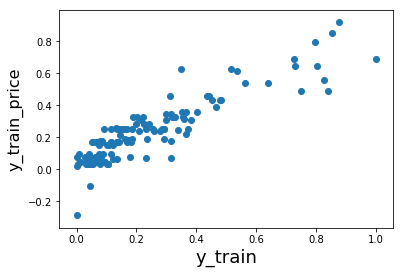

In [81]:
# Plotting y_train and y_train_price to understand the spread.
fig = plt.figure()
plt.scatter(y_train,y_train_price)              
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_train_price', fontsize=16) # y-label
plt.show()

##### Error Terms Plot

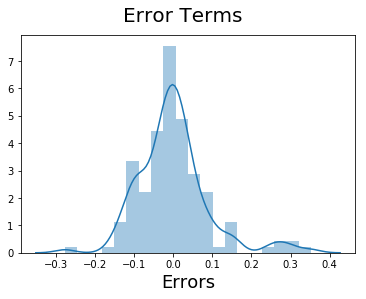

In [82]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   
plt.show()

- This plot clearly shows that residuals are normally distributed with zero mean.

### Prediction on test dataset

In [83]:
# taking variables for scalling for test data
num_var = ['fueltype','aspiration','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke'
          ,'horsepower','price']


#### Scaling on test data

In [84]:
# Scaling on test data using scaler transformation
df_test[num_var]= scaler.transform(df_test[num_var])

In [85]:
df_test.head()

,fueltype,aspiration,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,horsepower,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,enginelocation_rear,CarName_audi,CarName_bmw,CarName_buick,CarName_chevrolet,CarName_dodge,CarName_honda,CarName_isuzu,CarName_jaguar,CarName_mazda,CarName_mercury,CarName_mitsubishi,CarName_nissan,CarName_peugeot,CarName_plymouth,CarName_porsche,CarName_renault,CarName_saab,CarName_subaru,CarName_toyota,CarName_volkswagen,CarName_volvo
160,1.0,0.0,0.0,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,0.404762,0.424242,0.091667,0.072382,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,1.0,0.0,0.0,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,0.404762,0.611111,0.154167,0.093295,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,1.0,0.0,1.0,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,0.563492,0.606061,0.150000,0.102964,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,1.0,0.0,1.0,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,0.444444,0.449495,0.266667,0.115479,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,1.0,0.0,1.0,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,0.746032,0.227273,0.104167,0.068652,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
df_test.shape

(62, 53)

#### Dividing test set into X and y

In [87]:
#Dividing into X and y
y_test = df_test.pop('price')
X_test = df_test

#### Creating new dataframe and adding constant on test data

In [88]:
# Now let's use our model to make predictions.
X_train_new = X_train_new.drop('const',axis=1)
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

##### Making prediction on test data

In [89]:
# Making predictions
y_pred = lm.predict(X_test_new)

#### Checking R-squared on test data set

In [90]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7903981456250186

#### Checking mean-square-error

In [91]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE : 0.10584351253392157


#### y_test vs y_pred scatter plot

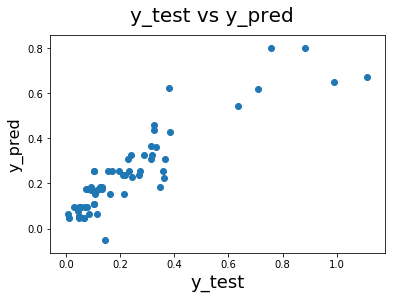

In [92]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 
plt.show()

### Model Evaluation

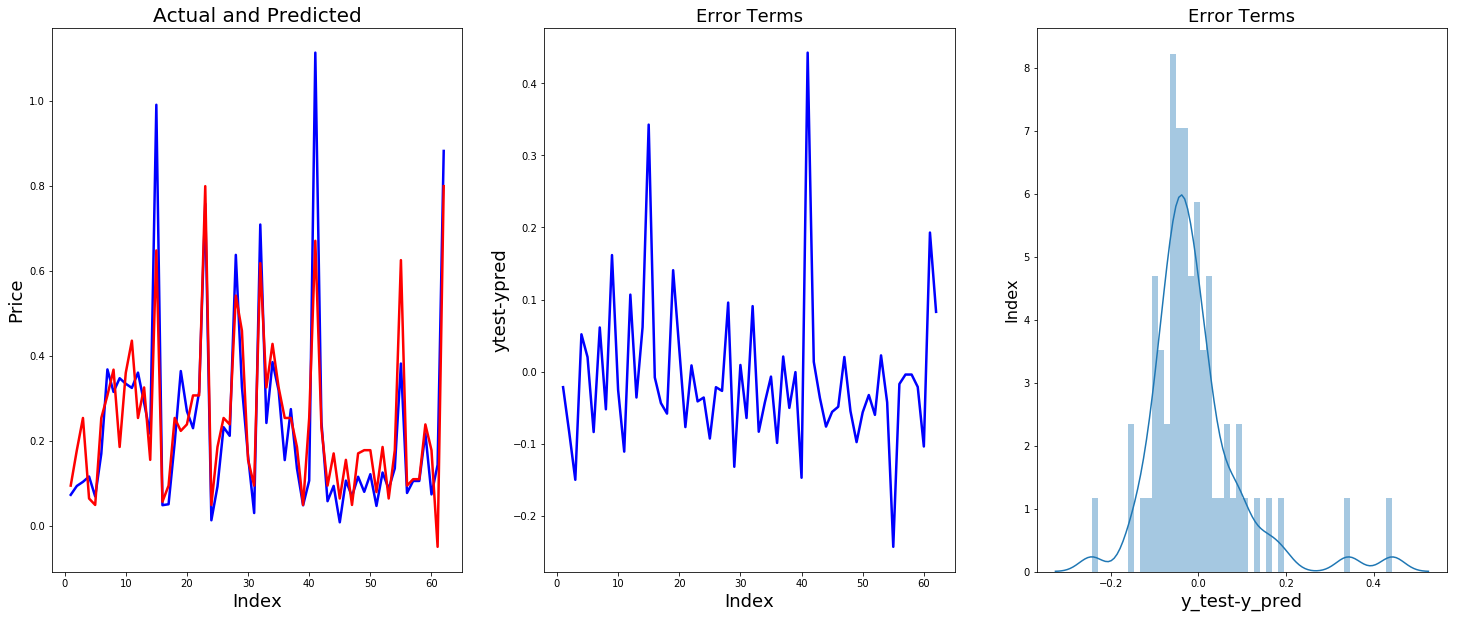

In [93]:
c = [i for i in range(1,63,1)] # generating index 
plt.figure(1,figsize=(25,10)) 
plt.subplot(1,3,1)
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-") #Plotting Actual
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-") #Plotting predicted
plt.title('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Price', fontsize=18)                       # Y-label

plt.subplot(1,3,2)
plt.plot(c,y_test-y_pred, color="blue", linewidth=2.5, linestyle="-")
plt.title('Error Terms', fontsize=18)              # Plot heading 
plt.xlabel('Index', fontsize=18)                      # X-label
plt.ylabel('ytest-ypred', fontsize=18)

plt.subplot(1,3,3)
sns.distplot((y_test-y_pred),bins=50)
plt.title('Error Terms', fontsize=18)                  # Plot heading 
plt.xlabel('y_test-y_pred', fontsize=18)                  # X-label
plt.ylabel('Index', fontsize=16)    
plt.show()

### The top features contributed in 'Carprice'
- carwidth
- enginetype_l
- cylindernumber_twelve
- CarName_bmw
- enginelocation_rear

#### Conclusion overall-fit model :

- R-sqaured and Adjusted R-squared is 0.820 and 0.813 - decent variance explained.
- F-stats and Prob(F-stats) is 124.7 and 3.41e-49 < 0.05 - Model fit is significant.
- p-values for all the coefficients seem to be less than the significance level of 0.05. i.e all the predictors are  statistically significant.
- R^2 on test set is 79% which is in range of 5% of R^2 on train set 82% which is significantly good. This indicates stability means that what the model learned in training set it is able to generalised in unseen test set.